In [929]:
from itertools import cycle
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, AutoLocator
from mpltools import annotation

plt.style.use('seaborn-poster')

In [930]:
!ls conv_rate_results

conv_results_cg_tri		   conv_results_lsh_alternative_quad_new2
conv_results_cgh_quad		   conv_results_lsh_alternative_tri
conv_results_cgh_tri		   conv_results_lsh_embedded_mass_tri
conv_results_cgls_quad		   conv_results_lsh_expanded_quad
conv_results_cgls_tri		   conv_results_lsh_expanded_tri
conv_results_cls_ip_primal_quad    conv_results_lsh_quad
conv_results_dls_ip_primal_quad    conv_results_lsh_quad_new
conv_results_dls_ip_primal_tri	   conv_results_lsh_tri
conv_results_hdg_quad		   conv_results_mixed_RT_quad
conv_results_hdg_tri		   conv_results_new_lsh_primal_quad
conv_results_ldgc_quad		   conv_results_new_lsh_primal_tri
conv_results_ldgc_tri		   conv_results_sdhm_quad
conv_results_ls_quad		   conv_results_sdhm_tri
conv_results_ls_tri		   conv_results_sipg_quad
conv_results_lsh_alternative_quad  conv_results_sipg_tri


In [931]:
result_cases_dirname_list = {
#     "LS-h": "conv_results_lsh_tri",
    # "LS-h-mass": "conv_results_lsh_embedded_mass_tri",
    # "LS-h-expanded": "conv_results_lsh_expanded_tri",
    # "SDHM": "conv_results_sdhm_quad",
    # "DLS-IP": "conv_results_dls_ip_primal_quad",
    # "CLS": "conv_results_cls_ip_primal_quad"
#     "HDG": "conv_results_hdg_tri",
    "LS-h-primal": "conv_results_new_lsh_primal_tri"
}

In [932]:
all_results = dict()
for case in result_cases_dirname_list:
    dirname = result_cases_dirname_list[case]
    df_result_case = pd.read_csv("./conv_rate_results/%s/errors.csv" % dirname)
    columns_to_apply = ["H1-error p", "Hdiv-error u", "L2-error p", "L2-error u", "Mesh size"]
    df_result_case[columns_to_apply] = df_result_case[columns_to_apply].apply(lambda x: np.log2(x))
    all_results[case] = df_result_case
    
# all_results['HDG']

## h-convergence

In [933]:
results_by_degree = dict()
min_degree, max_degree = 1, 5
for degree in range(min_degree, max_degree + 1):
    results_by_case = {}
    for case in result_cases_dirname_list:
        results_by_case[case] = all_results[case][all_results[case]["Degree"] == degree]

    results_by_degree[degree] = results_by_case
    
results_by_degree[1]

{'LS-h-primal':    Unnamed: 0 Element  Degree  Cells  log Cells  Mesh size  L2-error p  \
 0           0     Tri       1     32   0.752575       -1.5   -2.127973   
 1           1     Tri       1    128   1.053605       -2.5   -3.640275   
 2           2     Tri       1    512   1.354635       -3.5   -5.502636   
 3           3     Tri       1   2048   1.655665       -4.5   -7.464224   
 4           4     Tri       1   8192   1.956695       -5.5   -9.452754   
 
    log L2-error p  L2-error p order  H1-error p  log H1-error p  \
 0       -0.640584          1.847351    1.541239        0.463959   
 1       -1.095832          1.847351    0.737785        0.222095   
 2       -1.656458          1.847351   -0.212489       -0.063966   
 3       -2.246955          1.847351   -1.200525       -0.361394   
 4       -2.845562          1.847351   -2.197721       -0.661580   
 
    H1-error p order  L2-error u  log L2-error u  L2-error u order  \
 0          0.941623    1.535611        0.462265     

In [934]:
def plot_convergence_rate(
    results,
    slope_scalar,
    slope_flux,
    ncol=2,
    save_plot=False,
    file_to_save='',
    dir_to_save='',
    figure_extension='png',
    display_plot=True,
    high_quality=False,
    size_frac=0.2,
    figsize=(8, 10)
):
    if high_quality:
            fig, ax = plt.subplots(figsize=figsize, dpi=500)
    else:
        fig, ax = plt.subplots(figsize=figsize)

    cycle_colors = cycle('brgcmk')
    color_scalar = next(cycle_colors)
    color_flux = next(cycle_colors)
    markers = cycle(('s', '*', '^', 'o', 'D', '>', '<')) 
    for case in results:
        mesh_size = results[case]["log Cells"].values
        scalar_error = results[case]["log L2-error p"].values
        flux_error = results[case]["log L2-error u"].values

        marker_scalar = next(markers)
        ax.plot([np.nan], [np.nan], '', color='w', label='%s:' % case)
        ax.plot(
            mesh_size, 
            scalar_error,
            linestyle="-",
            marker=marker_scalar,
            color=color_scalar,
            markersize=10,
            linewidth=3,
            label="scalar"
        )

        marker_flux = next(markers)
        ax.plot(
            mesh_size, 
            flux_error,
            linestyle="--",
            marker=marker_flux,
            color=color_flux,
            markersize=12,
            linewidth=3,
            label="flux"
        )
        
    box = ax.get_position()
#     ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                      box.width, box.height * 0.9])
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
#               fancybox=True, shadow=True)
    ax.legend(loc='center', bbox_to_anchor=(0.5, 1.1),
              fancybox=True, shadow=True, ncol=ncol)
    
    plt.xlabel(r"$-\log_{10}( h )$")
    plt.ylabel(r"$\log_{10}\left(||e||_{L^2(\Omega)}\right)$")

    ax.tick_params(which='both', top=True, right=True)
    ax.xaxis.set_major_locator(AutoLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_major_locator(AutoLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=8)
    ax.tick_params(which='minor', length=4)

    id_ref_solution_point_to_marker = -2
    scalar_marker_x = mesh_size[id_ref_solution_point_to_marker] - 0.025 * mesh_size[id_ref_solution_point_to_marker]
    scalar_marker_y = scalar_error[id_ref_solution_point_to_marker]
    annotation.slope_marker(
        origin=(scalar_marker_x, scalar_marker_y), 
        slope=-slope_scalar, 
        invert=True, 
        size_frac=size_frac, 
        pad_frac=0.1, 
        text_kwargs={
            'fontsize': 18,
            # 'text': slope_scalar,
            'color': color_scalar
        },
        poly_kwargs={
            'color': color_scalar,
            'alpha': 1
        },
        ax=ax
    )

    flux_marker_x = mesh_size[id_ref_solution_point_to_marker] - 0.025 * mesh_size[id_ref_solution_point_to_marker]
    flux_marker_y = flux_error[id_ref_solution_point_to_marker]
    annotation.slope_marker(
        origin=(flux_marker_x, flux_marker_y), 
        slope=-slope_flux, 
        invert=True, 
        size_frac=size_frac, 
        pad_frac=0.1, 
        text_kwargs={
            'fontsize': 18,
            # 'text': slope_flux,
            'color': color_flux
        },
        poly_kwargs={
            'color': color_flux,
            'alpha': 1
        },
        ax=ax
    )

    plt.tight_layout()
    if save_plot:
        if dir_to_save == '':
            dir_to_save = './conv_result'

        os.makedirs(dir_to_save, exist_ok=True)

        if file_to_save == '':
            file_to_save = 'plot_conv_%i' % degree

        file_to_save = file_to_save + (".%s" % figure_extension)
        plt.savefig(file_to_save, bbox_inches='tight')

    if display_plot:
        plt.show()
        
    return

/home/diego/firedrake/lib/python3.8/site-packages/mpltools/annotation/_slopemarker.py:128: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return plt.Polygon(verts, **poly_kwargs)


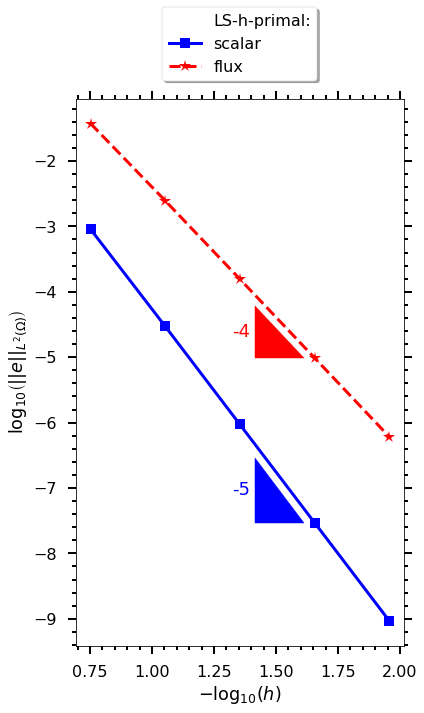

In [938]:
###########################################################
# Tri
###########################################################

# Degree 1
# origin_slope_scalar=(3, -5.),
# origin_slope_flux=(3, -1.5),
# Degree 2
# origin_slope_scalar=(3, -10.5),
# origin_slope_flux=(3, -7.),
# Degree 3
# origin_slope_scalar=(3, -13.75),
# origin_slope_flux=(3, -11.),
# Degree 4
# origin_slope_scalar=(3, -19.),
# origin_slope_flux=(3, -15.5),

###########################################################
# Quads
###########################################################

# Degree 1
# origin_slope_scalar=(3, -4.5),
# origin_slope_flux=(3, -2.5),
# Degree 2
# origin_slope_scalar=(3, -9.5),
# origin_slope_flux=(3, -6.5),
# Degree 3
# origin_slope_scalar=(3, -14.5),
# origin_slope_flux=(3, -8.5),
# Degree 4
# origin_slope_scalar=(3, -19.),
# origin_slope_flux=(3, -12.5),

# filename = 'tri_deg%i' % degree
degree = 4
filename = f'dls_ip_quad_{degree}_seminario'
plot_convergence_rate(
    results_by_degree[degree],
    slope_scalar=degree + 1,
    slope_flux=degree,
    ncol=1,
    file_to_save=filename,
    size_frac=0.15,
    save_plot=False,
    figsize=(6, 10)
)

## p-convergence